In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [14]:
import linearmodels

In [15]:
from linearmodels.panel import PanelOLS

In [16]:
#path = "allegations.csv"
#df=pd.read_csv(path,sep=",",engine='python')
pathdata="https://raw.githubusercontent.com/ndrettakis/Police-Misconduct-Stat-app/main/allegations_202007271729.xlsx"
df=pd.read_excel(pathdata)

df=df[df['year_received']>=2000]

# Transformation en dummies

In [17]:
#on simplifie les valeurs de la colonne ethnicity 
df['mos_ethnicity']=df['mos_ethnicity'].replace(["Asian","American Indian"],"Other minority")

In [18]:
race=pd.get_dummies(df['mos_ethnicity'])
for i in race.columns:
  df[i]=race[i]

In [19]:
rank=pd.get_dummies(df['rank_incident'])
for i in rank.columns:
  df[i]=rank[i]

In [20]:
gender=pd.get_dummies(df['mos_gender'])
for i in gender.columns:
  df[i]=gender[i]

# Analyse sur toute la période 

Dans cette partie on cherche à regarder l'impact du genre et de l'ethnie sur le nombre de plaintes, en comparant entre les complaintes prones et les autres 

In [21]:
Complaint_per_officer=pd.DataFrame(df['unique_mos_id'].value_counts())
Complaint_per_officer=Complaint_per_officer.reset_index()
m=Complaint_per_officer['unique_mos_id'].mean()
std=Complaint_per_officer['unique_mos_id'].std()
Complaint_per_officer=Complaint_per_officer.rename(columns={"index":"unique_mos_id",'unique_mos_id':"number_complaint"})
print(m,std)

8.099693251533742 7.58996362623574


In [22]:
Complaint_per_officer_clean=Complaint_per_officer[Complaint_per_officer["number_complaint"]<(m+3*std)]
id=Complaint_per_officer_clean["unique_mos_id"].values
Complaint_prone=Complaint_per_officer_clean[Complaint_per_officer_clean["number_complaint"]>m]
id_p=Complaint_prone["unique_mos_id"].values

In [17]:
df_all=df.drop(['first_name', 'last_name', 'command_now', 'shield_no',
       'complaint_id', 'month_received', 'year_received', 'month_closed',
       'year_closed', 'command_at_incident', 'rank_abbrev_incident',
       'rank_abbrev_now', 'rank_now', 'rank_incident', 'mos_ethnicity',
       'mos_gender', 'mos_age_incident', 'complainant_ethnicity',
       'complainant_gender', 'complainant_age_incident', 'fado_type',
       'allegation', 'precinct', 'contact_reason', 'outcome_description',
       'board_disposition','Captain', 'Chiefs and other ranks', 'Deputy Inspector',
       'Detective', 'Inspector', 'Lieutenant', 'Police Officer', 'Sergeant'], axis=1)
df_prone=df_all.merge(Complaint_prone, on="unique_mos_id")
df_all=df_all.merge(Complaint_per_officer_clean, on="unique_mos_id")

In [18]:
df_prone=df_prone.drop_duplicates()
df_all=df_all.drop_duplicates()

In [19]:
df_all

,unique_mos_id,Black,Hispanic,Other minority,White,F,M,number_complaint
0,4905,0,1,0,0,0,1,13
13,6101,0,1,0,0,0,1,12
25,6196,0,0,0,1,0,1,9
34,6943,0,0,0,1,0,1,22
56,6977,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...
28578,36143,0,0,0,1,0,1,19
28597,36153,0,0,0,1,0,1,6
28603,36023,0,0,0,1,0,1,1
28604,36113,0,0,0,1,0,1,1


# Régression du sexe et de l'ethnie sur le nombre de plaintes sur toute la base 


In [20]:
y=df_all[['number_complaint']]
X=df_all[['Black','Other minority','Hispanic']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       number_complaint   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.183
Date:                Wed, 20 Apr 2022   Prob (F-statistic):            0.00142
Time:                        17:04:51   Log-Likelihood:                -12333.
No. Observations:                3834   AIC:                         2.467e+04
Df Residuals:                    3830   BIC:                         2.470e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.6588      0.137     56.

/Users/louisedubois/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
y=df_prone[['number_complaint']]
X=df_prone[['Black','Other minority','Hispanic']]
#'Hispanic','Other minority','Black'
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
# Avec statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       number_complaint   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5982
Date:                Wed, 20 Apr 2022   Prob (F-statistic):              0.616
Time:                        17:04:51   Log-Likelihood:                -3817.8
No. Observations:                1250   AIC:                             7644.
Df Residuals:                    1246   BIC:                             7664.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             14.7033      0.199     73.

/Users/louisedubois/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Analyse par année

In [34]:
def get_age_clean(df):
    for i in range(len(df)-1):
        if df.unique_mos_id[i]==df.unique_mos_id[i+1]:
            age=df.mos_age_incident[i]
            df.mos_age_incident[i+1]=age
    return df 

def get_clean(x,df):
    df=df[df['year_received']==x]
    Complaint_per_officer=pd.DataFrame(df['unique_mos_id'].value_counts())
    Complaint_per_officer=Complaint_per_officer.reset_index()
    Complaint_per_officer=Complaint_per_officer.rename(columns={"index":"unique_mos_id",'unique_mos_id':"number_complaint"})
    m=Complaint_per_officer['unique_mos_id'].mean()
    std=Complaint_per_officer['unique_mos_id'].std()
    Complaint_per_officer_clean=Complaint_per_officer[Complaint_per_officer["number_complaint"]<(m+3*std)]
    df=df.merge(Complaint_per_officer_clean, on="unique_mos_id")
    df=df.drop(["command_now","shield_no",'command_at_incident','rank_abbrev_incident','rank_abbrev_now',"complaint_id","month_received","year_received","month_closed","year_closed","complainant_ethnicity",
              "complainant_gender","complainant_age_incident","fado_type","allegation","precinct"
              ,"contact_reason","outcome_description","board_disposition"], axis=1)
    df=get_age_clean(df)
    df=df.drop_duplicates()
    df=df.assign(Year=x)
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    return df
    


# Panel data 

In [35]:
df_panel=get_clean(2000,df)

for i in range(2001,2019):
    df1=get_clean(i,df)
    df_panel=pd.concat([df_panel,df1], ignore_index=True)

/var/folders/nl/g373_csn5kx03w80c1r1g7500000gn/T/ipykernel_46144/1785085450.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.mos_age_incident[i+1]=age


In [41]:
df_panel = df_panel.set_index(["unique_mos_id", "Year"])

In [42]:
df_panel

,,first_name,last_name,rank_now,rank_incident,mos_ethnicity,mos_gender,mos_age_incident,Black,Hispanic,Other minority,...,Chiefs and other ranks,Deputy Inspector,Detective,Inspector,Lieutenant,Police Officer,Sergeant,F,M,number_complaint
unique_mos_id,Year,,,,,,,,,,,,,,,,,,,,,
12074,2000-01-01,Richard,Mccarty,Detective,Detective,White,M,32,0,0,0,...,0,0,1,0,0,0,0,0,1,4
1622,2000-01-01,Carl,Roadarmel,Detective,Detective,White,M,36,0,0,0,...,0,0,1,0,0,0,0,0,1,1
18399,2000-01-01,Douglas,Lansing,Detective,Detective,White,M,32,0,0,0,...,0,0,1,0,0,0,0,0,1,5
23315,2000-01-01,Howard,Shank,Detective,Detective,White,M,35,0,0,0,...,0,0,1,0,0,0,0,0,1,4
23548,2000-01-01,Gerald,Heanue,Detective,Detective,White,M,30,0,0,0,...,0,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26960,2018-01-01,Nicholas,Graziano,Sergeant,Sergeant,White,M,33,0,0,0,...,0,0,0,0,0,0,1,0,1,1
28823,2018-01-01,Audrey,Wise,Sergeant,Sergeant,Black,F,47,1,0,0,...,0,0,0,0,0,0,1,1,0,2
35948,2018-01-01,Michael,Hansson,Sergeant,Sergeant,White,M,30,0,0,0,...,0,0,0,0,0,0,1,0,1,3


In [44]:
exog_vars = ['Black','Hispanic', 'Other minority', 'F', 'mos_age_incident']
exog = sm.add_constant(df_panel[exog_vars])
mod = PanelOLS(df_panel.number_complaint, exog,time_effects=True)
fe_res = mod.fit()
print(fe_res)

/Users/louisedubois/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                          PanelOLS Estimation Summary                           
Dep. Variable:       number_complaint   R-squared:                        0.0067
Estimator:                   PanelOLS   R-squared (Between):              0.0157
No. Observations:               10740   R-squared (Within):              -0.0037
Date:                Mon, May 02 2022   R-squared (Overall):              0.0046
Time:                        18:05:27   Log-likelihood                -2.448e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      14.404
Entities:                        3768   P-value                           0.0000
Avg Obs:                       2.8503   Distribution:                 F(5,10716)
Min Obs:                       1.0000                                           
Max Obs:                       13.000   F-statistic (robust):             14.404
                            

In [29]:
df_function_2014=get_clean(2014,df)
df_function_2014
df_function_2018=get_clean(2018,df)
df_function_2015=get_clean(2015,df)

/var/folders/nl/g373_csn5kx03w80c1r1g7500000gn/T/ipykernel_12418/2762934415.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.mos_age_incident[i+1]=age


# Regression for one year 

In [31]:
#'Captain',
 #      'Chiefs and other ranks', 'Deputy Inspector', 'Detective', 'Inspector',
#       'Lieutenant', 'Sergeant'

y=df_function_2015[['number_complaint']]
X=df_function_2015[['Black',
       'Hispanic', 'Other minority', 'Captain', 'F', 'mos_age_incident']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       number_complaint   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.506
Date:                Wed, 20 Apr 2022   Prob (F-statistic):              0.173
Time:                        17:09:05   Log-Likelihood:                -1805.4
No. Observations:                 809   AIC:                             3625.
Df Residuals:                     802   BIC:                             3658.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.0145      0.438  

/Users/louisedubois/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
df_2014=df[df['year_received']==2014]

In [19]:
Complaint_per_officer=pd.DataFrame(df_2014['unique_mos_id'].value_counts())
Complaint_per_officer=Complaint_per_officer.reset_index()
m_2014=Complaint_per_officer['unique_mos_id'].mean()
std_2014=Complaint_per_officer['unique_mos_id'].std()
Complaint_per_officer=Complaint_per_officer.rename(columns={"index":"unique_mos_id",'unique_mos_id':"number_complaint"})
Complaint_per_officer


,unique_mos_id,number_complaint
0,31972,27
1,15557,18
2,25785,17
3,32684,16
4,712,15
...,...,...
751,32900,1
752,32494,1
753,8799,1
754,25599,1


In [20]:
#on enlève les officiers avec trop de plaintes, les outliers 
Complaint_per_officer_clean=Complaint_per_officer[Complaint_per_officer["number_complaint"]<(m_2014+3*std_2014)]
id=Complaint_per_officer_clean["unique_mos_id"].values
Complaint_prone=Complaint_per_officer_clean[Complaint_per_officer_clean["number_complaint"]>2]
id_p=Complaint_prone["unique_mos_id"].values
len(id_p)
Complaint_prone

,unique_mos_id,number_complaint
19,20982,10
20,11676,10
21,17313,9
22,23890,9
23,15046,9
...,...,...
313,5873,3
314,17711,3
315,8029,3
316,33812,3


In [21]:
df_2014=df_2014[df_2014['unique_mos_id'].isin(id)]

df_2014=df_2014.merge(Complaint_per_officer_clean, on="unique_mos_id")
df_2014=df_2014.drop(["complaint_id","month_received","year_received","month_closed","year_closed","complainant_ethnicity",
              "complainant_gender","complainant_age_incident","fado_type","allegation","precinct"
              ,"contact_reason","outcome_description","board_disposition"], axis=1)

#df_2014_prone=df_2014.merge(Complaint_prone, on="unique_mos_id")


In [22]:
df_2014.sort_values(by=['unique_mos_id'])
df_2014.to_csv("df_2014.csv")

Régler le problème des personnes qui passent d'un âge à l'autre

In [42]:
ages=pd.DataFrame(df_2014[['unique_mos_id','mos_age_incident']])
ages

,unique_mos_id,mos_age_incident
18,21022,38
19,21022,38
61,14714,39
62,14714,39
98,19943,36
...,...,...
33288,36143,47
33289,36143,48
33290,36143,48
33291,36143,48


In [44]:
ages=df_2014[['unique_mos_id','mos_age_incident']]
ages

,unique_mos_id,mos_age_incident
18,21022,38
19,21022,38
61,14714,39
62,14714,39
98,19943,36
...,...,...
33288,36143,47
33289,36143,48
33290,36143,48
33291,36143,48


In [24]:
#ages=ages.reset_index()

In [25]:
#ages=ages.sort_values(by="unique_mos_id")

In [26]:
#ages.unique_mos_id[1]

21022

In [27]:
#ages.drop_duplicates()

,index,unique_mos_id,mos_age_incident
331,331,28,30
333,333,28,30
334,334,28,30
332,332,28,30
467,467,73,25
...,...,...,...
1492,1492,36248,39
1494,1494,36248,39
1496,1496,36339,26
1497,1497,36339,26


In [28]:
for i in range(len(ages["mos_age_incident"])-1):
  if ages.unique_mos_id[i]==ages.unique_mos_id[i+1]:
    age=ages.mos_age_incident[i]
    ages.mos_age_incident[i+1]=age
    print(i)

0
2
5
8
9
11
12
13
15
16
17
18
19
20
21
24
25
26
29
31
32
35
36
37
38
39
40
44
45
46
47
48
50
52
53
54
55
57
59
61
63
64
65
69
70
71
72
74
75
76
77
78
80
81
82
84
85
86
87
90
91
92
93
95
96
97
98
99
100
102
103
104
106
109
111
112
113
116
117
118
119
120
123
125
127
128
129
130
131
133
134
137
138
140
141
143
144
150
152
153
155
156
158
159
163
167
169
171
173
174
175
176
177
178
179
180
181
183
184
185
186
187
188
189
193
194
195
196
197
198
200
203
206
207
210
212
216
217
219
221
222
223
225
226
227
229
230
231
232
233
239
241
242
243
245
246
247
248
251
255
258
260
262
263
264
265
267
268
269
272
273
274
275
276
278
279
280
281
283
285
286
288
289
290
291
293
294
295
296
297
298
301
302
303
304
307
309
311
315
317
318
319
320
323
324
325
329
331
332
333
335
336
337
339
340
342
343
345
346
349
350
351
353
355
358
359
361
362
363
366
367
370
372
373
374
375
376
377
379
380
381
382
385
386
387
388
389
390
394
395
397
398
399
402
403
404
408
409
411
412
413
414
415
417
419
420
421
422
4

In [29]:
#ages=ages.drop("index",axis=1)

In [30]:
#ages.to_csv("test.csv")

In [31]:
#ages=ages.sort_values(by="unique_mos_id")
#ages

,unique_mos_id,mos_age_incident
331,28,30
333,28,30
334,28,30
332,28,30
467,73,25
...,...,...
1495,36248,39
1494,36248,39
1497,36339,26
1496,36339,26


In [32]:
df_2014.sort_values(by="unique_mos_id")
df_2014

,unique_mos_id,first_name,last_name,command_now,shield_no,command_at_incident,rank_abbrev_incident,rank_abbrev_now,rank_now,rank_incident,...,Chiefs and other ranks,Deputy Inspector,Detective,Inspector,Lieutenant,Police Officer,Sergeant,F,M,number_complaint
0,21022,Thomas,Passolo,GVSD Z1,0,081 PCT,CPT,CPT,Captain,Captain,...,0,0,0,0,0,0,0,0,1,2
1,21022,Thomas,Passolo,GVSD Z1,0,081 PCT,CPT,CPT,Captain,Captain,...,0,0,0,0,0,0,0,0,1,2
2,14714,Osvaldo,Nunez,114 PCT,0,042 PCT,CPT,DI,Deputy Inspector,Captain,...,0,0,0,0,0,0,0,0,1,2
3,14714,Osvaldo,Nunez,114 PCT,0,042 PCT,CPT,DI,Deputy Inspector,Captain,...,0,0,0,0,0,0,0,0,1,2
4,19943,Stephen,Espinoza,E S U,0,NARCBBN,CPT,CPT,Captain,Captain,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,36143,Raymond,Tomins,WARRSEC,5336,WARRSEC,SGT,SDS,Sergeant,Sergeant,...,0,0,0,0,0,0,1,0,1,4
1950,36143,Raymond,Tomins,WARRSEC,5336,WARRSEC,SGT,SDS,Sergeant,Sergeant,...,0,0,0,0,0,0,1,0,1,4
1951,36143,Raymond,Tomins,WARRSEC,5336,WARRSEC,SGT,SDS,Sergeant,Sergeant,...,0,0,0,0,0,0,1,0,1,4
1952,36143,Raymond,Tomins,WARRSEC,5336,WARRSEC,SGT,SDS,Sergeant,Sergeant,...,0,0,0,0,0,0,1,0,1,4


In [33]:
df_2014["officer_age"]=ages.mos_age_incident
df_2014=df_2014.drop("mos_age_incident",axis=1)

In [34]:
df_2014=df_2014.drop_duplicates()


In [35]:
df_2014.to_csv("test_2014.csv")

In [38]:
df_2014.columns

Index(['unique_mos_id', 'first_name', 'last_name', 'command_now', 'shield_no',
       'command_at_incident', 'rank_abbrev_incident', 'rank_abbrev_now',
       'rank_now', 'rank_incident', 'mos_ethnicity', 'mos_gender', 'Black',
       'Hispanic', 'Other minority', 'White', 'Captain',
       'Chiefs and other ranks', 'Deputy Inspector', 'Detective', 'Inspector',
       'Lieutenant', 'Police Officer', 'Sergeant', 'F', 'M',
       'number_complaint', 'officer_age'],
      dtype='object')

# Regression 

In [39]:
y=df_2014[['number_complaint']]
X=df_2014[['Black',
       'Hispanic', 'Other minority', 'Captain',
       'Chiefs and other ranks', 'Deputy Inspector', 'Detective', 'Inspector',
       'Lieutenant', 'Sergeant', 'F', 'officer_age']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       number_complaint   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.231
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.262
Time:                        15:40:26   Log-Likelihood:                -1518.0
No. Observations:                 747   AIC:                             3060.
Df Residuals:                     735   BIC:                             3115.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

/Users/louisedubois/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


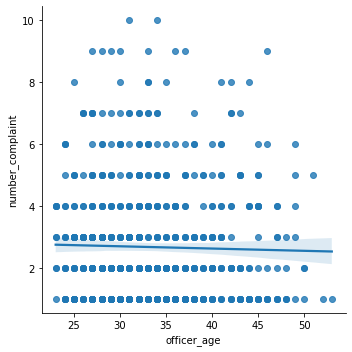

In [171]:
sns.lmplot(x="officer_age", y="number_complaint", data=df_2014);

In [ ]:
#il reste des duplicates de policiers qui ont changé de grade/precinct dans une même année, au nombre de 9